# [**Chemin de régularisation de la régression logistique $\ell_1$**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_1_linear_model/plot_logistic_path.ipynb)<br/>([_Regularization path of $\ell_1$- Logistic Regression_](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html))

Cet exemple présente l'entraînement de modèles de régression logistique pénalisée $\ell_1$ pour un problème de classification binaire dérivé de l'ensemble de données Iris.

Les modèles sont classés de la régularisation la plus forte à la moins régularisée. Les 4 coefficients des modèles sont collectés et tracés sous forme de « chemin de régularisation » : du côté gauche de la figure (fortes régularisations), tous les coefficients sont exactement nuls. À mesure que la régularisation se relâche, les coefficients peuvent prendre des valeurs non nulles les uns après les autres.

Ici, nous choisissons le solveur `liblinear` car il peut optimiser efficacement la perte de régression logistique avec une pénalité $\ell_1$ non lisse ni inductrice de parcimonie.

Notez également que nous définissons une faible valeur de tolérance pour nous assurer que le modèle a convergé avant de collecter les coefficients.

Nous utilisons également `warm_start=True`, ce qui signifie que les coefficients des modèles sont réutilisés pour initialiser l'ajustement du modèle suivant afin d'accélérer le calcul du chemin complet.

```python
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause
```

# Chargement des données

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X /= X.max()  # Normalize X to speed-up convergence

# Calcul du chemin de régularisation

In [2]:
import numpy as np

from sklearn import linear_model
from sklearn.svm import l1_min_c

cs = l1_min_c(X, y, loss="log") * np.logspace(0, 10, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

# Tracé du chemin de régularisation

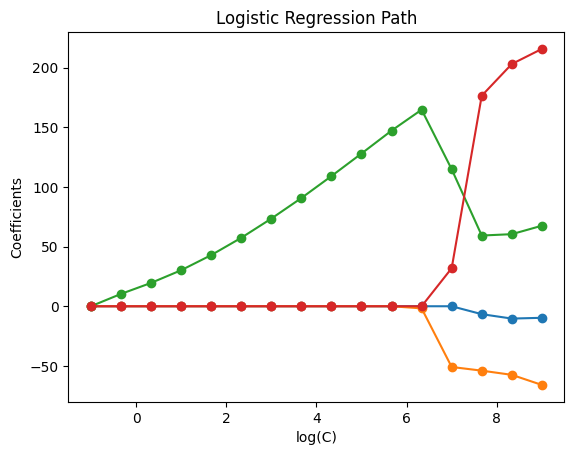

In [3]:
import matplotlib.pyplot as plt

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()